In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
start_dt = '2019-10-01'
end_dt = '2019-12-01'
(pd.to_datetime(end_dt) - pd.to_datetime(start_dt))/pd.to_timedelta('1d')

61.0

In [4]:
pd.to_timedelta('1d')/pd.to_timedelta('1s')

86400.0

TODO: find out how to plot functions with more pronounced tails -> answer: change the spread factor to lower values

In [139]:
def f(x, seasonality):
    noise = 0.15
    spread_factor = 0.001*len(x)

    x = (x - np.min(x)) % seasonality
    x_spread = np.max(x) - np.min(x)
    return (l := 1/(spread_factor*x_spread*np.sqrt(np.pi*2))*np.exp(-(x-x[int(x_spread/2)])**2/(spread_factor*x_spread))) + noise*l*np.random.rand(len(x))
    

def create_ts_from_dist(start_dt, end_dt, time_interval, seasonality, func=f):
    """sample a time series with seasonality from the function func. All native pandas timedeltas are supported."""
    def calculate_periods():
        return int((pd.to_datetime(end_dt) - pd.to_datetime(start_dt)) /
                   pd.to_timedelta(f'1{time_interval.lower()}')/seasonality)
    
    periods = calculate_periods()

    x = pd.date_range(start_dt,end_dt, freq=f'1{time_interval.lower()}')
    x_ints = x.astype(np.int32)/(pd.Timedelta(f'1{time_interval.lower()}')/pd.Timedelta('1nanosecond'))
    y = func(x_ints, seasonality)
    return x, y
    
    

([<matplotlib.axis.XTick at 0x7efb377624f0>,
 <a list of 29 Text xticklabel objects>)

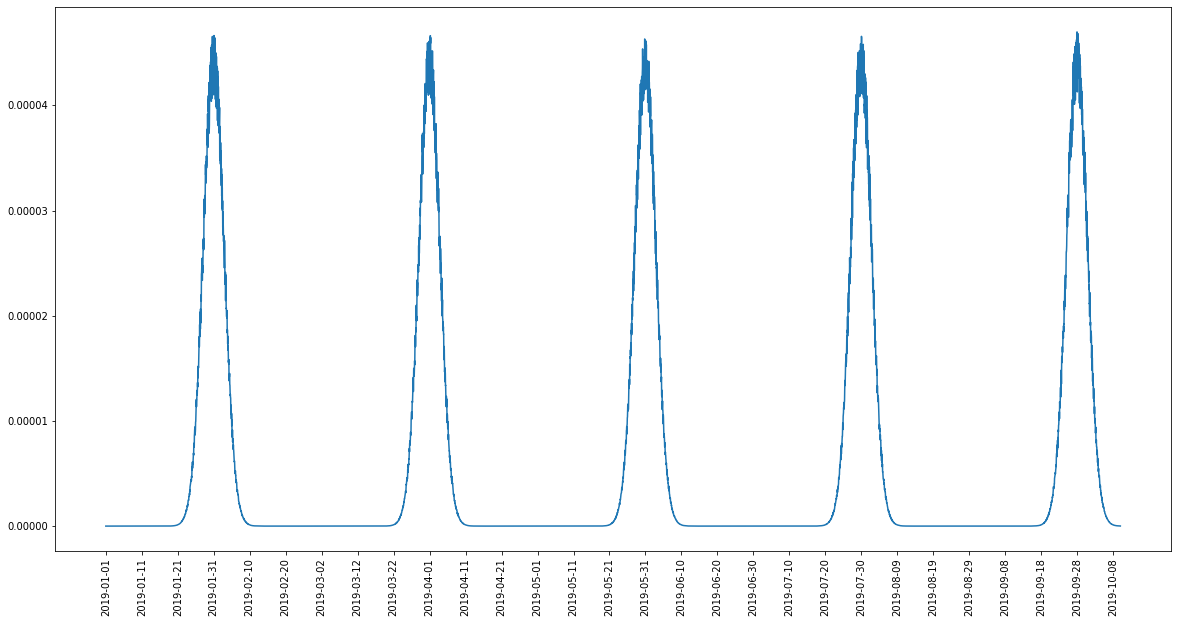

In [140]:
x, y = create_ts_from_dist('2019-01-01','2019-10-10', 'H', 60*24)
plt.figure(figsize=(20,10))
plt.plot(x,y)
plt.xticks(x[::10*24], rotation=90)

([<matplotlib.axis.XTick at 0x7efb3b42de50>,
 <a list of 29 Text xticklabel objects>)

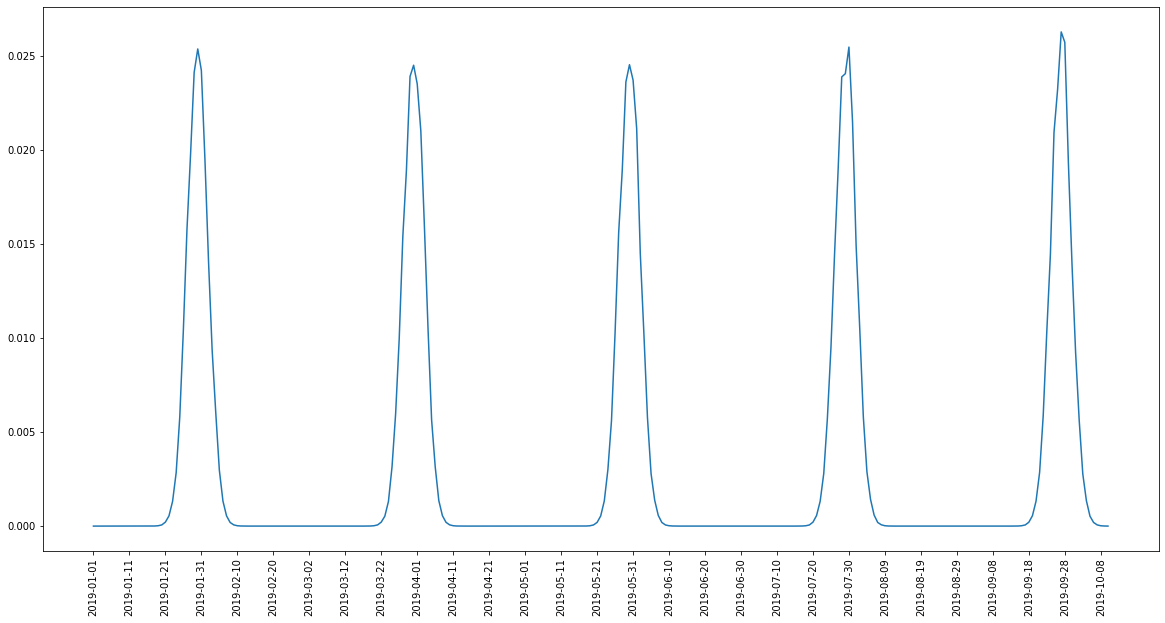

In [141]:
x, y = create_ts_from_dist('2019-01-01','2019-10-10', 'D', 60)
plt.figure(figsize=(20,10))
plt.plot(x,y)
plt.xticks(x[::10], rotation=90)

In [123]:

start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2019-10-10')

In [ ]:
pd.

In [138]:
pd.date_range(start_date,end_date).astype(np.int32)/(60**2*24*1E9)

Float64Index([17897.0, 17898.0, 17899.0, 17900.0, 17901.0, 17902.0, 17903.0,
              17904.0, 17905.0, 17906.0,
              ...
              18170.0, 18171.0, 18172.0, 18173.0, 18174.0, 18175.0, 18176.0,
              18177.0, 18178.0, 18179.0],
             dtype='float64', length=283)

In [126]:
pd.date_range(start_date,end_date)

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04',
               '2019-10-05', '2019-10-06', '2019-10-07', '2019-10-08',
               '2019-10-09', '2019-10-10'],
              dtype='datetime64[ns]', length=283, freq='D')

In [130]:
1546300800000000000/17897

86400000000000.0

In [137]:
 == 1546300800000000000/17897

True

In [125]:
start_date - pd.to_datetime('1970-01-01')

Timedelta('17897 days 00:00:00')

In [128]:
pd.to_datetime(100)

Timestamp('1970-01-01 00:00:00.000000100')

In [104]:
np.exp(start_date)

TypeError: loop of ufunc does not support argument 0 of type Timestamp which has no callable exp method

In [109]:
pd.date_range(start_date, end_date)[0]

Timestamp('2019-01-01 00:00:00', freq='D')

In [107]:
(pd.date_range(start_date, end_date)[0]).day

1

In [103]:
help(pd.date_range(start_date, end_date)[0])

Help on Timestamp in module pandas._libs.tslibs.timestamps object:

class Timestamp(pandas._libs.tslibs.c_timestamp._Timestamp)
 |  Timestamp(ts_input=<object object at 0x7efbf9ffab10>, freq=None, tz=None, unit=None, year=None, month=None, day=None, hour=None, minute=None, second=None, microsecond=None, nanosecond=None, tzinfo=None)
 |  
 |  Pandas replacement for python datetime.datetime object.
 |  
 |  Timestamp is the pandas equivalent of python's Datetime
 |  and is interchangeable with it in most cases. It's the type used
 |  for the entries that make up a DatetimeIndex, and other timeseries
 |  oriented data structures in pandas.
 |  
 |  Parameters
 |  ----------
 |  ts_input : datetime-like, str, int, float
 |      Value to be converted to Timestamp.
 |  freq : str, DateOffset
 |      Offset which Timestamp will have.
 |  tz : str, pytz.timezone, dateutil.tz.tzfile or None
 |      Time zone for time which Timestamp will have.
 |  unit : str
 |      Unit used for conversion if 

In [94]:
getattr((end_date -start_date),'')

AttributeError: 'Timedelta' object has no attribute 'years'

In [ ]:
create_ts_from_dist('2019-01-01', '2019-10-10')

In [ ]:
pd.DataFra

In [11]:
np.repeat(np.random.rand(), (10))

array([0.71292117, 0.71292117, 0.71292117, 0.71292117, 0.71292117,
       0.71292117, 0.71292117, 0.71292117, 0.71292117, 0.71292117])